<a href="https://colab.research.google.com/github/zayo1511/LaboratorioDeAnalisisDeDatosFinancierosYDeDisenoDeIndicadores/blob/main/quiz04_forecast_sem_DiegoLozoya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiz 4

## Estudio de caso: ShopEase Inc.
ShopEase Inc. es una empresa minorista en línea que ha estado en funcionamiento durante los últimos 5 años. La gerencia se centra en dos objetivos clave:
- Prever las ventas futuras para optimizar el inventario y las estrategias de marketing.
- Entender cómo la satisfacción del cliente afecta el LTV.

Para lograr estos objetivos, ShopEase ha proporcionado dos conjuntos de datos:
- ecommerce_sales_data.csv: Datos de ventas mensuales de los últimos 5 años.
- customer_satisfaction_data.csv: Indicadores de satisfacción del cliente de una muestra de 500 clientes.

La gerencia quiere que los ayude a:
- Prever las ventas para los próximos 12 meses.
- Crear un modelo de ecuación estructural (SEM) para comprender cómo la satisfacción del cliente se ve influenciada por el tiempo de respuesta, la calidad del producto y la probabilidad de recomendación, y cómo estos factores afectan los ingresos de la empresa.

### Pregunta 1: Pronóstico de Ventas para ShopEase Inc.

Objetivo: ShopEase quiere saber cuántas ventas puede esperar en los próximos 12 meses para planificar su inventario y campañas de marketing.

Instrucciones:
- Utiliza el archivo ecommerce_sales_data.csv que contiene las ventas mensuales de los últimos 5 años.
- Crea un modelo de series temporales usando la librería auto_ts para predecir las ventas mensuales durante los próximos 12 meses.
- Visualiza las predicciones en un gráfico junto con los datos históricos.
- Explica tus conclusiones sobre el comportamiento esperado de las ventas en el próximo año.

### Pregunta 2: Modelado de Ecuaciones Estructurales (SEM)
Objetivo: ShopEase quiere entender mejor cómo los diferentes factores de satisfacción del cliente (tiempo de respuesta, calidad del producto y probabilidad de recomendación) afectan el valor total esperado de vida de un cliente (LTV).

Instrucciones:
- Utiliza el archivo customer_satisfaction_data.csv que contiene los indicadores de satisfacción del cliente.
- Define las siguientes relaciones en un modelo SEM:
    - Confianza del cliente como variable latente, medida por el tiempo de respuesta, calidad del producto, y probabilidad de recomendación.
- Ajusta el modelo y explica los coeficientes de las relaciones entre las variables.
- Proporciona conclusiones sobre larelación que tiene la satisfacción del cliente con el valor de vida del cliente en ShopEase.

In [1]:
pip install auto-ts -q --disable-pip-version-check > /dev/null 2>&1

In [2]:
pip install prophet -q --disable-pip-version-check > /dev/null 2>&1

In [3]:
!pip install semopy -q --disable-pip-version-check > /dev/null 2>&1

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from auto_ts import auto_timeseries
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from semopy import Model, Optimizer, semplot
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Colab Notebooks/Laboratorio de analisis de datos financieros y de diseño de indicadores/Analisis estadistico avanzado para KPIs/'

Mounted at /content/drive


In [6]:
df = pd.read_csv(data_path + 'ecommerce_sales_data.csv', parse_dates=['Fecha'])
df.set_index('Fecha', inplace=True)
df.head()

,Ventas
Fecha,
2019-10-31 11:48:50.173779,3929.298727
2019-11-30 11:48:50.173779,4250.388935
2019-12-31 11:48:50.173779,5295.721284
2020-01-31 11:48:50.173779,5678.582934
2020-02-29 11:48:50.173779,5839.616780


##Pregunta 1

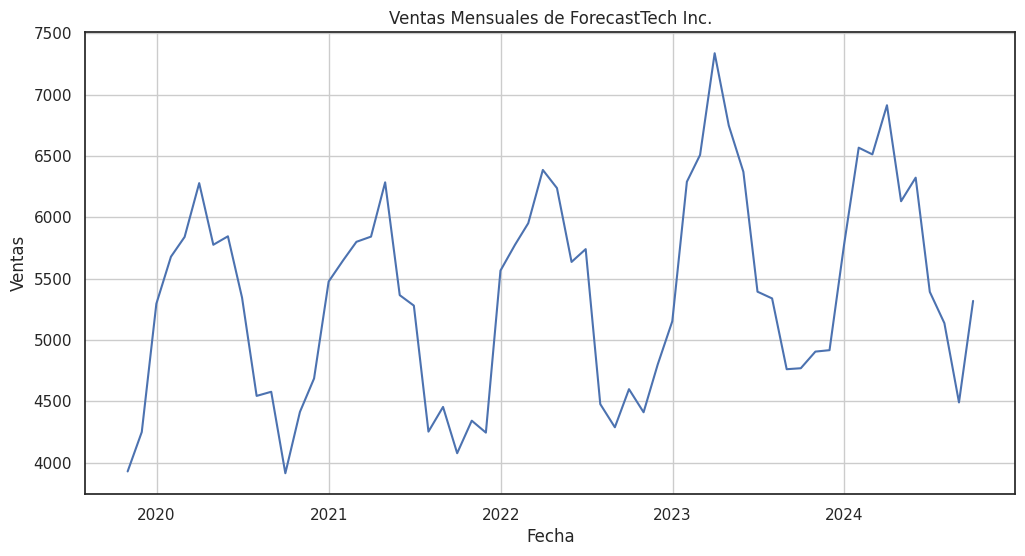

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Ventas'])
plt.title('Ventas Mensuales de ForecastTech Inc.')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

###ML

Start of Fit.....
    Target variable given as = Ventas
Start of loading of data.....
    Inputs: ts_column = Fecha, sep = ,, target = ['Ventas']
    Using given input: pandas dataframe...
    train time series Fecha column is the index on test data...
    train data shape = (48, 1)
Alert: Could not detect strf_time_format of Fecha. Provide strf_time format during "setup" for better results.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model


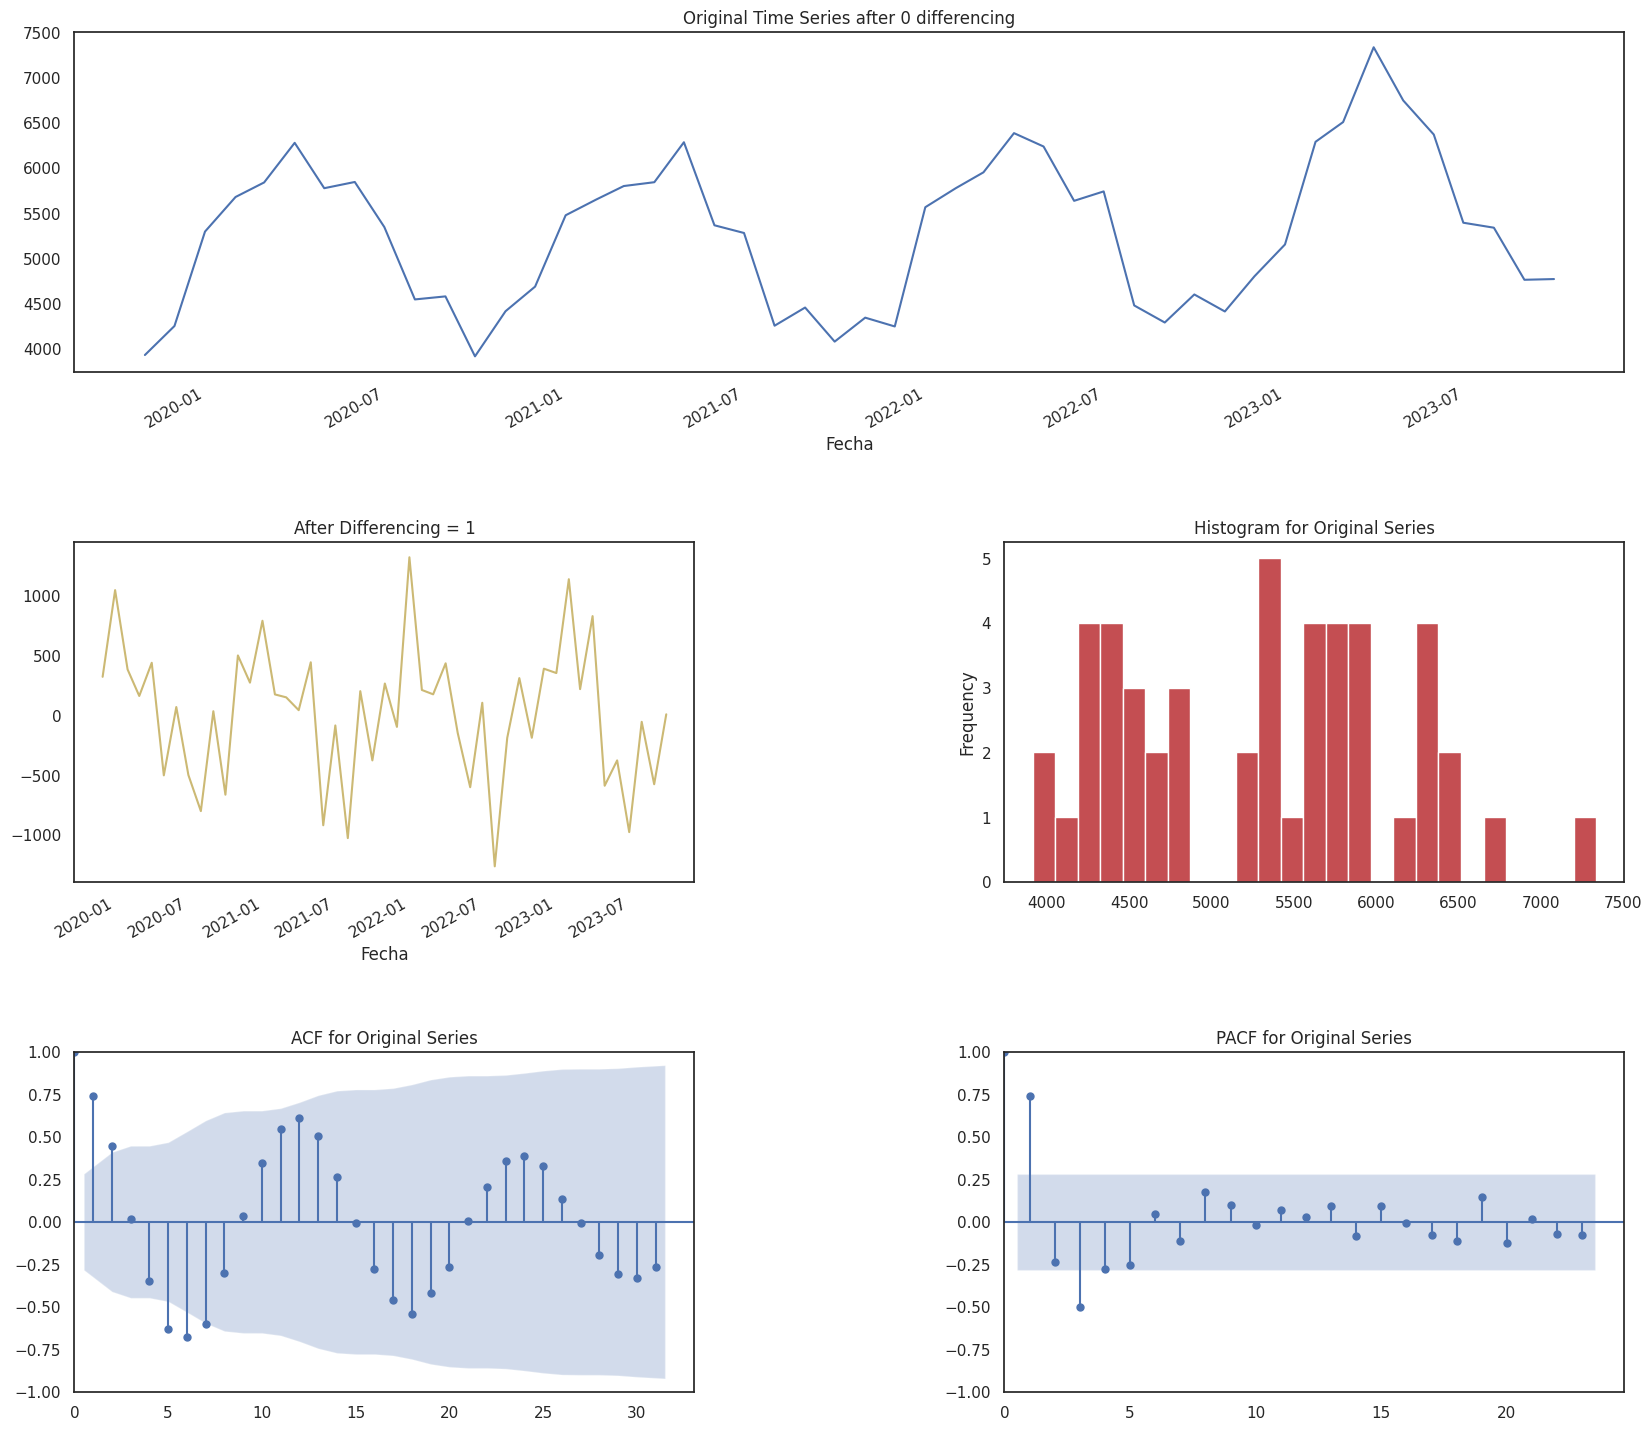

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmphr2dcvji/v2areglc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphr2dcvji/j5anp_qb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26963', 'data', 'file=/tmp/tmphr2dcvji/v2areglc.json', 'init=/tmp/tmphr2dcvji/j5anp_qb.json', 'output', 'file=/tmp/tmphr2dcvji/prophet_model7jdxe799/prophet_model-20241023141856.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
14:18:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


kwargs for Prophet model: {'random_state': 42}
    Fit-Predict data (shape=(48, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 23 Test Shape: 5


14:18:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmphr2dcvji/jvzxfoe1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphr2dcvji/dilqe96y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25512', 'data', 'file=/tmp/tmphr2dcvji/jvzxfoe1.json', 'init=/tmp/tmphr2dcvji/dilqe96y.json', 'output', 'file=/tmp/tmphr2dcvji/prophet_modelfugayb0j/prophet_model-20241023141856.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
14:18:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


    RMSE = 823.24
    Std Deviation of actuals = 718.07
    Normalized RMSE (as pct of std dev) = 115%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 28 Test Shape: 5


14:18:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Exception occurred while building Prophet model...
'DataFrame' object has no attribute 'append'
    FB Prophet may not be installed or Model is not running...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 23 Test Shape: 5

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=163.188, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=166.571, Time=0.39 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=161.206, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=165.057, Time=0.10 sec
 ARIMA(0,0,1)(

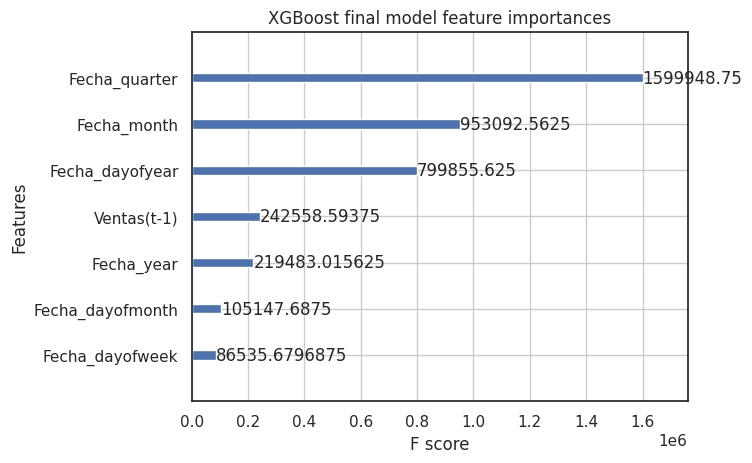

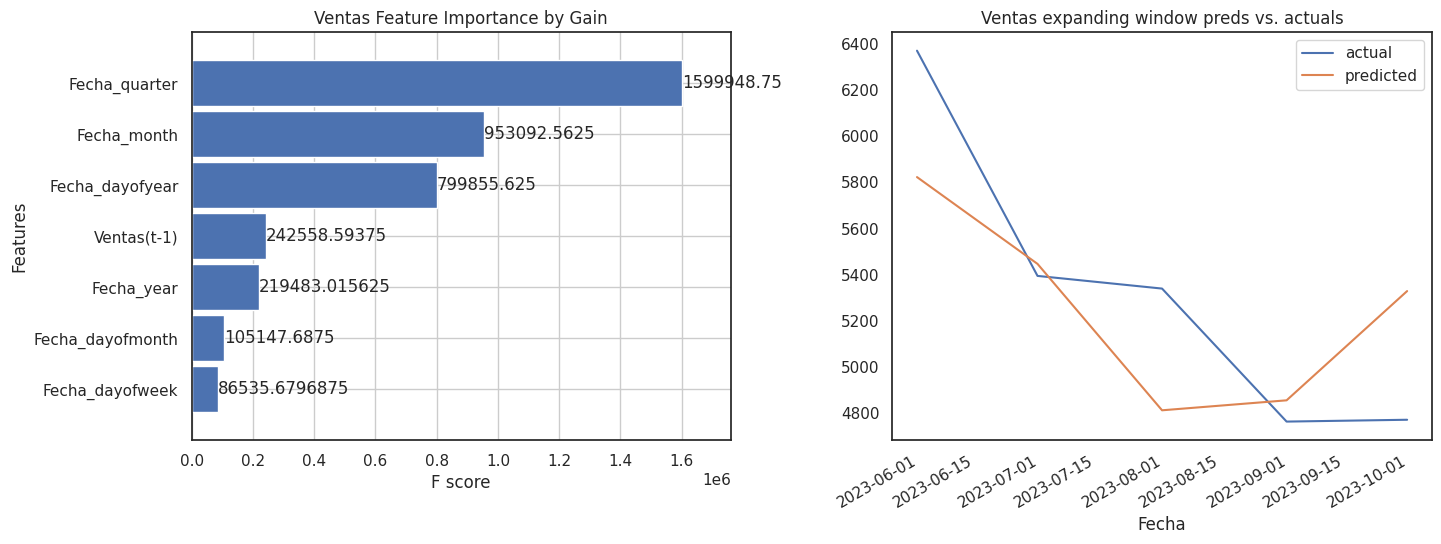

In [8]:
model = auto_timeseries(
    score_type='rmse',       # Métrica de evaluación
    time_interval='M',       # Intervalo mensual
    non_seasonal_pdq=None,   # Para modelos SARIMAX
    seasonality=True,       # Deshabilitar búsqueda de estacionalidad (se puede cambiar)
    model_type='best',       # Seleccionar el mejor modelo
    verbose=2,               # Nivel de verbosidad
    random_state=42
)

train_size = int(0.8 * len(df))
train_df = df[:train_size]
test_df = df[train_size:]

model.fit(
    traindata=train_df,
    ts_column=train_df.index.name,
    target='Ventas'
)

###Prophet

In [9]:
df = df.reset_index()  # Resetear el índice para convertirlo en columna
df.rename(columns={'index': 'ds'}, inplace=True)

df['ds'] = pd.to_datetime(df['Fecha'])  # Asegurarse de que la columna de fechas se llame 'ds'
df.rename(columns={'Ventas': 'y'}, inplace=True)  # Renombrar columna objetivo a 'y' como en Prophet

# Dividir los datos en entrenamiento (train_df) y prueba (test_df)
train_size = int(0.8 * len(df))
train_df_prophet = df[:train_size]
test_df_prophet = df[train_size:]

# Crear el modelo Prophet con estacionalidad habilitada
model_prophet = Prophet(seasonality_mode='additive')  # Se asume que la estacionalidad es relevante

# Ajustar el modelo con los datos de entrenamiento
train_df_prophet = df.drop(train_df_prophet.columns[0], axis=1)
model_prophet.fit(train_df_prophet[['ds', 'y']])

# Crear el dataframe de predicciones para el futuro
future = model_prophet.make_future_dataframe(periods=len(test_df_prophet), freq='M')  # Predicción mensual

# Realizar las predicciones
forecast_prophet = model_prophet.predict(future)

# Extraer las predicciones para las fechas de prueba
forecast_test = forecast_prophet[-len(test_df_prophet):]

# Comparar predicciones con los valores reales
comparison_prophet = pd.DataFrame({
    'real': test_df_prophet['y'].values,
    'predicted': forecast_test['yhat'].values
})

# Calcular las métricas de evaluación (RMSE y MAE)
mae_prophet = mean_absolute_error(test_df_prophet['y'], forecast_test['yhat'])
rmse_prophet = np.sqrt(mean_squared_error(test_df_prophet['y'], forecast_test['yhat']))

print(comparison_prophet)
print(f'MAE: {mae_prophet}, RMSE: {rmse_prophet}')

DEBUG:cmdstanpy:input tempfile: /tmp/tmphr2dcvji/1kv658o5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphr2dcvji/an5pz2fp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86394', 'data', 'file=/tmp/tmphr2dcvji/1kv658o5.json', 'init=/tmp/tmphr2dcvji/an5pz2fp.json', 'output', 'file=/tmp/tmphr2dcvji/prophet_modelui84ao5p/prophet_model-20241023141903.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:19:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:19:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


           real    predicted
0   4905.620662  4952.415092
1   4917.184984  5145.630522
2   5778.900615  6112.954151
3   6566.700181  6435.023845
4   6512.165839  6677.865726
5   6912.617769  7087.101715
6   6130.467633  6767.300573
7   6322.594492  6476.686924
8   5392.363627  5990.085139
9   5137.081862  5292.865361
10  4491.712865  5067.361335
11  5318.414780  5081.696118
MAE: 286.49593241567044, RMSE: 346.3446823675868


###ARIMA

In [10]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)  # Usar la columna de fechas como índice
df.rename(columns={'Ventas': 'y'}, inplace=True)  # Renombrar la columna objetivo a 'y'

# Dividir los datos en entrenamiento (train_df) y prueba (test_df)
train_size = int(0.8 * len(df))
train_df_arima = df[:train_size]
test_df = df[train_size:]

# Crear y ajustar el modelo ARIMA automáticamente
model_arima = auto_arima(train_df_arima['y'], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

# Realizar predicciones sobre el periodo de prueba
forecast = model_arima.predict(n_periods=len(test_df))

# Comparar predicciones con los valores reales
comparison_arima = pd.DataFrame({
    'real': test_df['y'].values,
    'predicted': forecast
})

# Calcular las métricas de evaluación (RMSE y MAE)
mae_arima = mean_absolute_error(test_df['y'], forecast)
rmse_arima = np.sqrt(mean_squared_error(test_df['y'], forecast))

# Mostrar resultados
print(comparison_arima)
print(f'MAE: {mae_arima}, RMSE: {rmse_arima}')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=1.12 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=540.202, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=521.133, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=519.767, Time=0.27 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=521.522, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.54 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.93 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=521.782, Time=0.22 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=5.09 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=538.106, Time=0.41 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=519.949, Time=0.63 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=520.636, Time=1.39 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=520.036, Time=0.45 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.56 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=521.095, T

In [11]:
#ML
leaderboard = model.get_leaderboard()
rmse_ml = leaderboard[leaderboard['name'] == 'ML']['rmse'].values[0]

#Prophet
rmse_prophet = rmse_prophet

#ARIMA
rmse_arima = rmse_arima

def encontrar_mejor(a, b, c):
    # Crear un diccionario para mapear nombres a valores
    variables = {
        'ML': a,
        'Prophet': b,
        'ARIMA': c
    }

    # Encontrar la variable con el mayor valor
    mejor_variable = min(variables, key=variables.get)
    return mejor_variable

nombre_menor = encontrar_mejor(rmse_ml, rmse_prophet, rmse_arima)
print(f"El mejor modelo es: {nombre_menor}")

El mejor modelo es: Prophet


In [12]:
forecast = model.predict(testdata=test_df)
forecast.head()

Predicting using test dataframe shape = (12, 2) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for Fecha. Provide strf_time format during "setup" for better results.
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date

,yhat,mean_se,mean_ci_lower,mean_ci_upper
Fecha,,,,
2023-10-31 11:48:50.173779,4748.204102,NaN,NaN,NaN
2023-11-30 11:48:50.173779,4639.891602,NaN,NaN,NaN
2023-12-31 11:48:50.173779,5244.214844,NaN,NaN,NaN
2024-01-31 11:48:50.173779,5956.816406,NaN,NaN,NaN
2024-02-29 11:48:50.173779,6042.503906,NaN,NaN,NaN


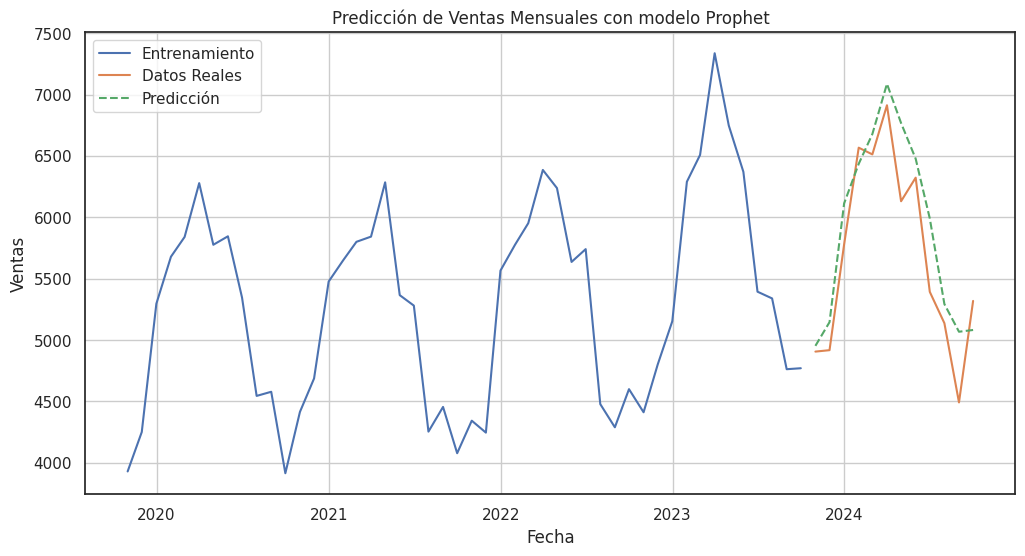

In [13]:
if nombre_menor == 'ML':
    plt.figure(figsize=(12,6))
    plt.plot(train_df.index, train_df['Ventas'], label='Entrenamiento')
    plt.plot(test_df.index, test_df['y'], label='Datos Reales')
    plt.plot(test_df.index, forecast['yhat'], label='Predicción', linestyle='--')
    plt.title('Predicción de Ventas Mensuales con modelo ML')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas')
    plt.legend()
    plt.grid(True)
    plt.show()
elif nombre_menor == 'Prophet':
    plt.figure(figsize=(12,6))
    plt.plot(train_df.index, train_df['Ventas'], label='Entrenamiento')
    plt.plot(test_df.index, comparison_prophet["real"], label='Datos Reales')
    plt.plot(test_df.index, comparison_prophet["predicted"], label='Predicción', linestyle='--')
    plt.title('Predicción de Ventas Mensuales con modelo Prophet')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas')
    plt.legend()
    plt.grid(True)
    plt.show()
elif nombre_menor == 'ARIMA':
    plt.figure(figsize=(12,6))
    plt.plot(train_df.index, train_df['Ventas'], label='Entrenamiento')
    plt.plot(test_df.index, comparison_arima["real"], label='Datos Reales')
    plt.plot(test_df.index, comparison_arima["predicted"], label='Predicción', linestyle='--')
    plt.title('Predicción de Ventas Mensuales con modelo ARIMA')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas')
    plt.legend()
    plt.grid(True)
    plt.show()

In [14]:
if nombre_menor == 'ML':
    rmse = mean_squared_error(test_df['y'], forecast['yhat'], squared=False)
    print(f'RMSE en el conjunto de prueba: {rmse:.2f}')
elif nombre_menor == 'Prophet':
    rmse = mean_squared_error(comparison_prophet["real"], comparison_prophet["predicted"], squared=False)
    print(f'RMSE en el conjunto de prueba: {rmse:.2f}')
elif nombre_menor == 'ARIMA':
    rmse = mean_squared_error(comparison_arima["real"], comparison_arima["predicted"], squared=False)
    print(f'RMSE en el conjunto de prueba: {rmse:.2f}')

RMSE en el conjunto de prueba: 346.34


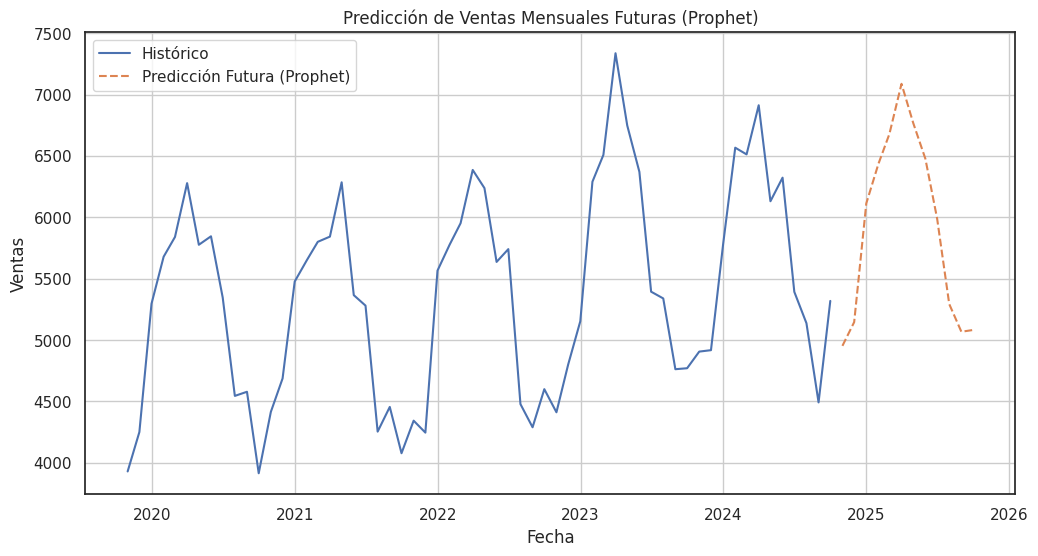

In [15]:
if nombre_menor == 'ML':
    # Modelo ML - Predicción Futura
    future_periods = 12
    last_date = df.index[-1]
    future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_periods, freq='M')

    future_df = pd.DataFrame(index=future_dates)
    future_forecast = model.predict(testdata=future_df)

    plt.figure(figsize=(12,6))
    plt.plot(df.index, df['y'], label='Histórico')
    plt.plot(future_dates, future_forecast['yhat'], label='Predicción Futura (ML)', linestyle='--')
    plt.title('Predicción de Ventas Mensuales Futuras (ML)')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas')
    plt.legend()
    plt.grid(True)
    plt.show()
elif nombre_menor == 'Prophet':
    # Modelo Prophet - Predicción Futura
    # Definir el número de períodos futuros
    future_periods = 12

    # Crear un DataFrame vacío con las fechas futuras
    last_date = df.index[-1]
    future_dates_prophet = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_periods, freq='M')
    future_df_prophet = pd.DataFrame(index=future_dates_prophet)

    # Predecir con el modelo Prophet utilizando predict()
    future = model_prophet.make_future_dataframe(periods=future_periods, freq='M')
    future_forecast_prophet = model_prophet.predict(future)

    # Visualización de las predicciones futuras con Prophet
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['y'], label='Histórico')
    plt.plot(future_df_prophet.index, future_forecast_prophet['yhat'].tail(12), label='Predicción Futura (Prophet)', linestyle='--')
    plt.title('Predicción de Ventas Mensuales Futuras (Prophet)')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas')
    plt.legend()
    plt.grid(True)
    plt.show()
elif nombre_menor == 'ARIMA':
    # Modelo ARIMA - Predicción Futura
    # Definir el número de períodos futuros
    future_periods = 12

    # Crear un DataFrame vacío con las fechas futuras
    last_date = df.index[-1]
    future_dates_arima = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_periods, freq='M')
    future_df_arima = pd.DataFrame(index=future_dates_arima)

    # Predecir con el modelo ARIMA utilizando predict()
    future_forecast_arima = model_arima.predict(n_periods=future_periods)

    # Visualización de las predicciones futuras con ARIMA
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['y'], label='Histórico')
    plt.plot(future_df_arima.index, future_forecast_arima, label='Predicción Futura (ARIMA)', linestyle='--')
    plt.title('Predicción de Ventas Mensuales Futuras (ARIMA)')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas')
    plt.legend()
    plt.grid(True)
    plt.show()

Para los proximos 12 meses se espera un pronóstico estacional, como se ha visto anteriormente. Las ventas aumentaran hasta llegar a un valor máximo mayor a 7000 al rededor de marzo de 2025, después bajará nuevamente a poco más de 5000 para septiembre aproximadamente del siguiente año (2025). La predicción sigue con la tendencia positiva que se puede observar en los últimos años.  

##Pregunta 2

In [16]:
data = pd.read_csv(data_path + 'customer_satisfaction_data.csv')
data.head()

,Tiempo_Respuesta,Calidad_Producto,Probabilidad_Recomendacion,LTV
0,7.993428,9.389266,7.402641,1156.97
1,6.723471,10.000000,7.562898,1324.58
2,8.295377,5.902149,5.911942,711.72
3,10.000000,8.844454,4.330033,899.99
4,6.531693,7.024036,7.432377,941.69


In [17]:
# Definir el modelo SEM
model_desc = """
# Latent Variables
Confianza =~ Tiempo_Respuesta + Calidad_Producto + Probabilidad_Recomendacion
"""

In [18]:
np.random.seed(42)

# Normalizar valores con MinMaxScaler
scaler = StandardScaler()

# 1. Variables relacionadas con Confianza
Tiempo_Respuesta = scaler.fit_transform(data['Tiempo_Respuesta'].values.reshape(-1, 1))
Calidad_Producto = scaler.fit_transform(data['Calidad_Producto'].values.reshape(-1, 1))
Probabilidad_Recomendacion = scaler.fit_transform(data['Probabilidad_Recomendacion'].values.reshape(-1, 1))

# Crear DataFrame final con todas las variables relevantes
data_sem = pd.DataFrame({
    "Tiempo_Respuesta": Tiempo_Respuesta.flatten(),
    "Calidad_Producto": Calidad_Producto.flatten(),
    "Probabilidad_Recomendacion": Probabilidad_Recomendacion.flatten(),
})

In [19]:
mod = Model(model_desc)
res_opt = mod.fit(data_sem)
estimates = mod.inspect()

# Imprimir los resultados del ajuste del modelo
print(estimates)

                         lval  op                        rval  Estimate  \
0            Tiempo_Respuesta   ~                   Confianza  1.000000   
1            Calidad_Producto   ~                   Confianza -0.141327   
2  Probabilidad_Recomendacion   ~                   Confianza -1.299332   
3                   Confianza  ~~                   Confianza  0.543099   
4            Calidad_Producto  ~~            Calidad_Producto  0.989200   
5  Probabilidad_Recomendacion  ~~  Probabilidad_Recomendacion  0.083047   
6            Tiempo_Respuesta  ~~            Tiempo_Respuesta  0.456705   

   Std. Err    z-value   p-value  
0         -          -         -  
1   0.06332  -2.231957  0.025618  
2  0.538484  -2.412946  0.015824  
3   0.23091   2.351998  0.018673  
4  0.062722  15.771129       0.0  
5  0.378129   0.219627  0.826161  
6  0.225808   2.022531  0.043122  


In [20]:
print(res_opt)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.000
Number of iterations: 30
Params: -0.141 -1.299 0.989 0.543 0.083 0.457


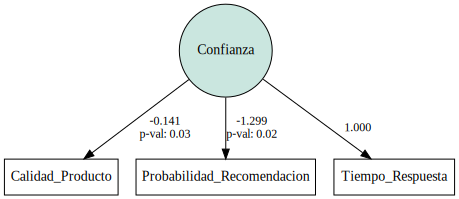

In [21]:
g = semplot(mod, "pd.png")
g

In [22]:
confianza_factors = [1.0, -1.299, -0.141]  # Tiempo_Respuesta, Probabilidad_Recomendacion, Calidad_Producto

# Función para calcular el valor de la variable latente
def calculate_latent_values(df):
    # Calcular Confianza como la suma ponderada de Uso, Seguridad y Recomendaciones
    df['Confianza'] = (df['Tiempo_Respuesta'] * confianza_factors[0] +
                       df['Probabilidad_Recomendacion'] * confianza_factors[1] +
                       df['Calidad_Producto'] * confianza_factors[2])

    return df['Confianza']

# Calcular valores latentes en el dataset
latent_values = calculate_latent_values(data_sem)

# Mostrar los primeros valores calculados
print(latent_values.head())

0   -0.300309
1   -1.206726
2    1.577300
3    3.631582
4   -0.881350
Name: Confianza, dtype: float64


**Relaciones entre Variables Latentes y Observadas**:
   - **Tiempo_Respuesta** (Confianza): Establecido como referencia con un valor de 1.0 (por convención en SEM).
   - **Probabilidad_Recomendacion** (Confianza): Estima una carga factorial de **-1.299**, lo que indica una fuerte relación negativa con la variable latente **Confianza**.
   - **Calidad_Producto** (Confianza): Tiene una carga factorial de **-0.141**, indicando una relación débil, negativa con **confianza**.
   - Ya que los coeficientes son negativos, sería adecuado decir, que el modelo SEM, está calculando la desconfianza de los clientes. Para ver los coeficientes con sentido, se tendría que decir, que el modelo explica en que medida de pierde la confianza de los clientes.

In [23]:
df = pd.DataFrame({
    'Confianza': latent_values,
    'LTV': data['LTV']
})

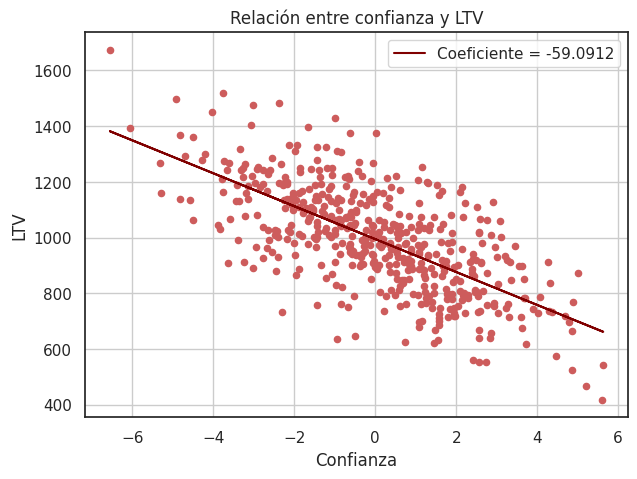

In [24]:
model = LinearRegression().fit(df[["Confianza"]], df[["LTV"]])

plt.figure(figsize=(7, 5))
plt.scatter(df["Confianza"], df["LTV"], s = 20, c="indianred")
plt.plot(df["Confianza"], model.predict(df[["Confianza"]]), label=("Coeficiente = " + str(np.round(model.coef_[0][0], 4))), color="maroon")
plt.title("Relación entre confianza y LTV")
plt.xlabel("Confianza")
plt.ylabel("LTV")
plt.grid()
plt.legend(loc="best")

In [25]:
df.corr()

,Confianza,LTV
Confianza,1.000000,-0.675299
LTV,-0.675299,1.000000


Existe una relación negativa entre el LTV y la confianza de los clientes. Como se explicó anteriormente, no es realmente confianza, sino que es desconfianza, por lo que esta relación negativa, dice que mientras más aumente la desconfianza de los clientes, menor será su LTV. De manera contraria explica que a mayor confianza mayor LTV, lógicamente.